In [1]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import pandas as pd

np.random.seed(42)

os.chdir("../")

In [15]:
ratings = pd.read_parquet("data/training/02_processed_data/processed_ratings.parquet")
users = pd.read_parquet("data/training/02_processed_data/users_processed.parquet")
movies = pd.read_parquet("data/training/02_processed_data/movies_processed.parquet")

ratings["date"] = pd.to_datetime(ratings["timestamp"], unit="s")
users["target"] = np.random.randint(0, 2, size=len(users))
users['year_month'] = np.random.choice(["01", "02", "03", "04", "05"], size=len(users))
ratings_samp = ratings.head(100000)

# create fixtures


In [ ]:
users.to_parquet("tests/fixtures/users_processed.parquet")
movies.to_parquet("tests/fixtures/movies_processed.parquet")

# Demo Eda Helper



In [3]:
from src.utils import eda_helper

# Basic Statistics

In [6]:
eda_helper.get_all_stats(users, "gender", "target")


,gender,count,proportion,target
0,F,1709,0.282947,0.497367
1,M,4331,0.717053,0.496421


In [7]:
eda_helper.value_counts(users, "age_binned").sort_values(by="value")

,var,value,count,proportion
6,age_binned,"(-inf, 1.0]",222,0.036755
2,age_binned,"(1.0, 18.0]",1103,0.182616
0,age_binned,"(18.0, 25.0]",2096,0.347020
1,age_binned,"(25.0, 35.0]",1193,0.197517
3,age_binned,"(35.0, 45.0]",550,0.091060
4,age_binned,"(45.0, 50.0]",496,0.082119
5,age_binned,"(50.0, 56.0]",380,0.062914
7,age_binned,missing,0,0.000000
8,age_binned,total,6040,1.000000


# Binning

In [4]:
users["age_binned"] = eda_helper.default_bin_numeric_feature(users, "age")
users["zip_binned"] = eda_helper.default_bin_categorical_feature(users, "zip")
eda_helper.value_counts(users, "age_binned").sort_values(by="value")

,var,value,count,proportion
6,age_binned,"(-inf, 1.0]",222,0.036755
2,age_binned,"(1.0, 18.0]",1103,0.182616
0,age_binned,"(18.0, 25.0]",2096,0.347020
1,age_binned,"(25.0, 35.0]",1193,0.197517
3,age_binned,"(35.0, 45.0]",550,0.091060
4,age_binned,"(45.0, 50.0]",496,0.082119
5,age_binned,"(50.0, 56.0]",380,0.062914
7,age_binned,missing,0,0.000000
8,age_binned,total,6040,1.000000


# Numerical Features

#### With specified bins

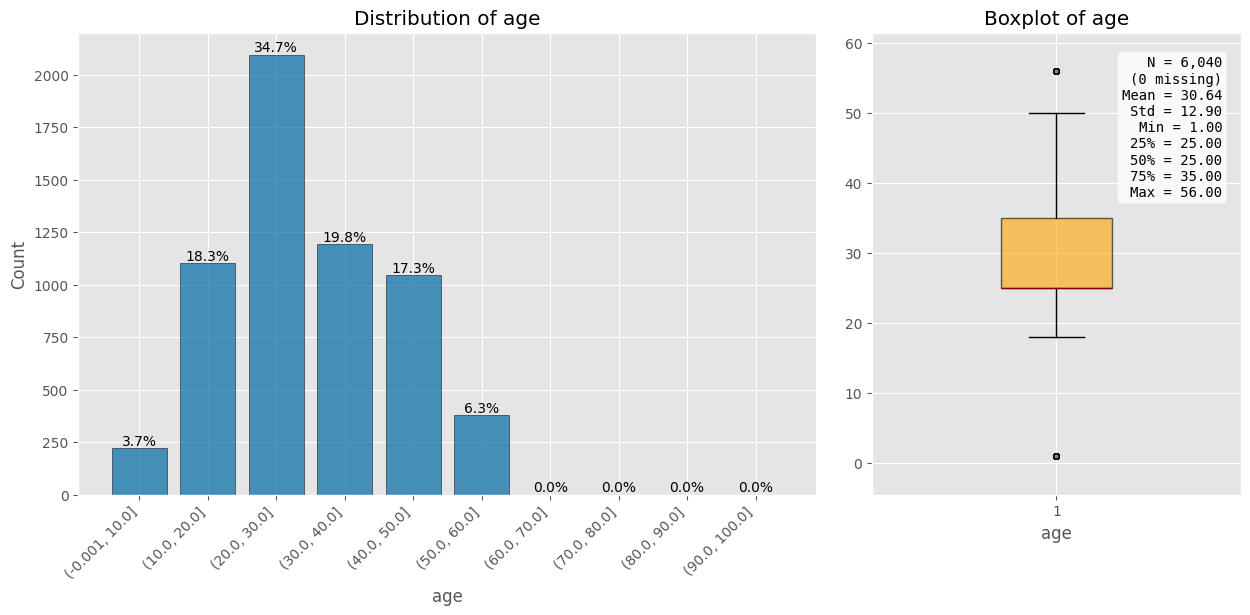

In [8]:
fig = eda_helper.analyze_numeric_feature(users, "age", breaks=np.arange(0, 110, 10))


#### With quantile bins

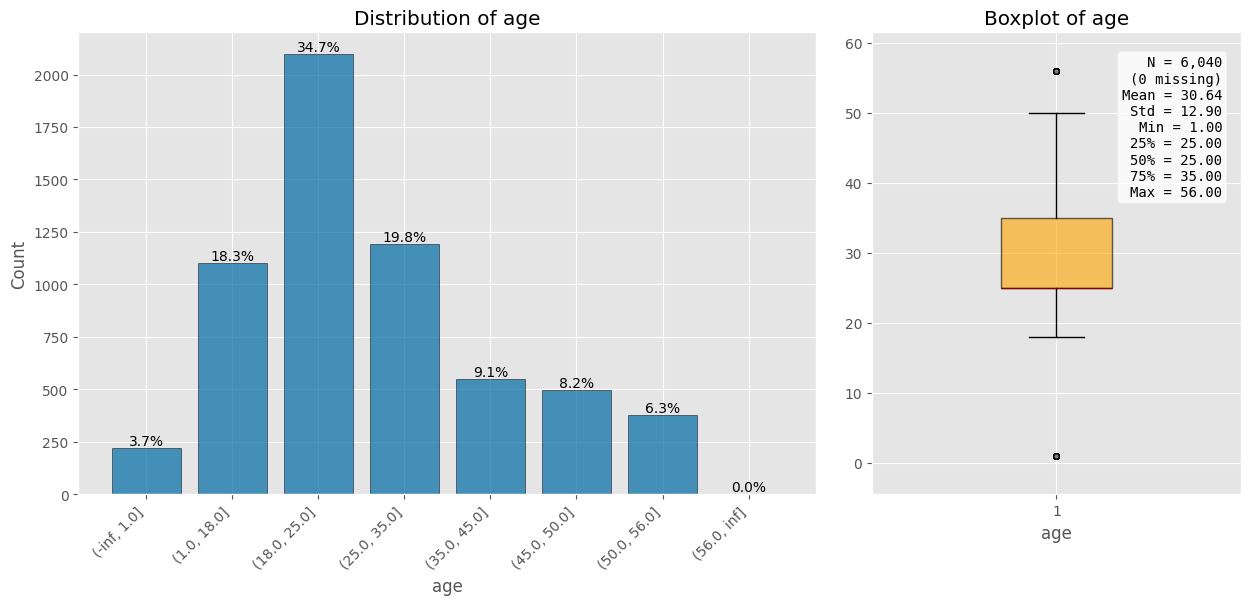

In [9]:
fig = eda_helper.analyze_numeric_feature(users, "age", bins=10)

#### Quantile bins with single binary target


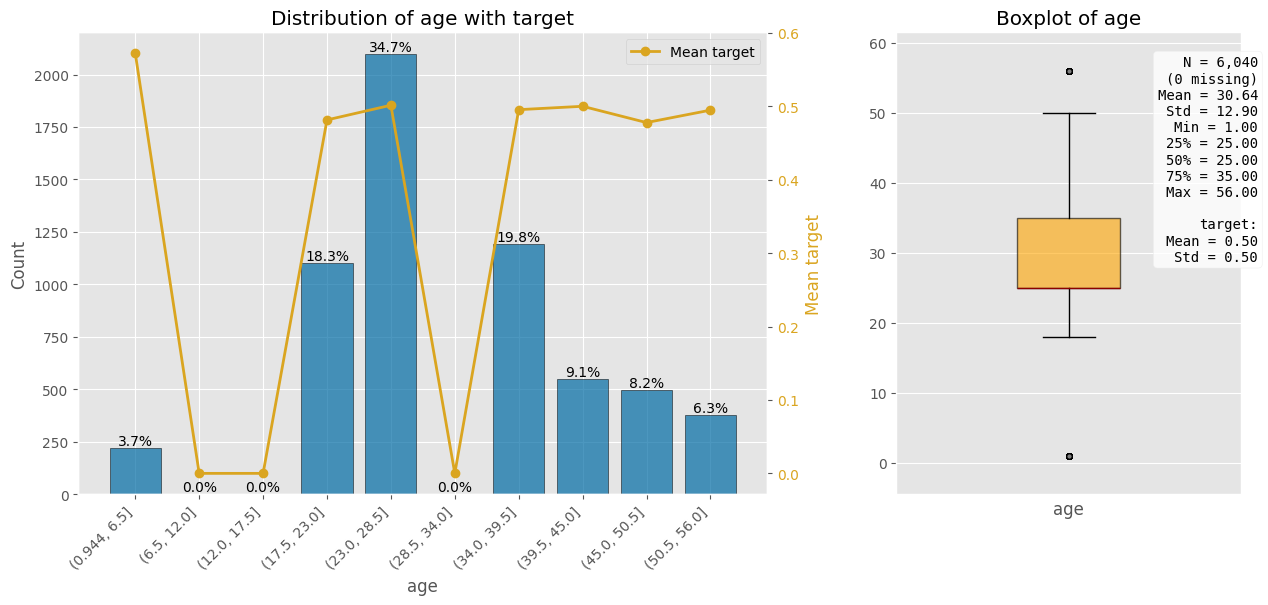

In [10]:
fig = eda_helper.analyze_numeric_feature_with_target(users, "age", target="target")


#### Quantile bins with multiple binary targets



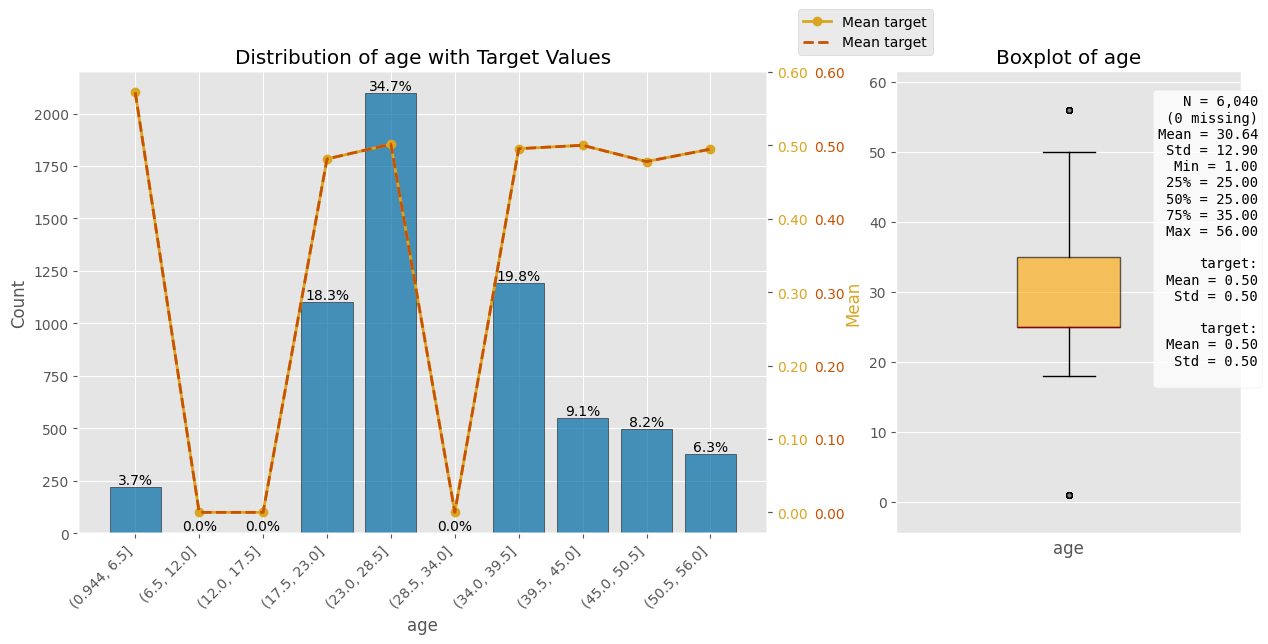

In [11]:
fig = eda_helper.analyze_numeric_feature_with_targets(
    users, "age", targets=["target", "target"]
)

# Quantile bins with single binary target across time

In [17]:
fig = eda_helper.eda_numerical(users, "age", label="target", timecol="year_month")
fig.show()

#### Quantile bins WITHOUT single binary target across time

In [19]:
fig = eda_helper.eda_numerical(users, "age", timecol="year_month")
fig.show()

# Categorical Features

#### distribution with max bins = 10


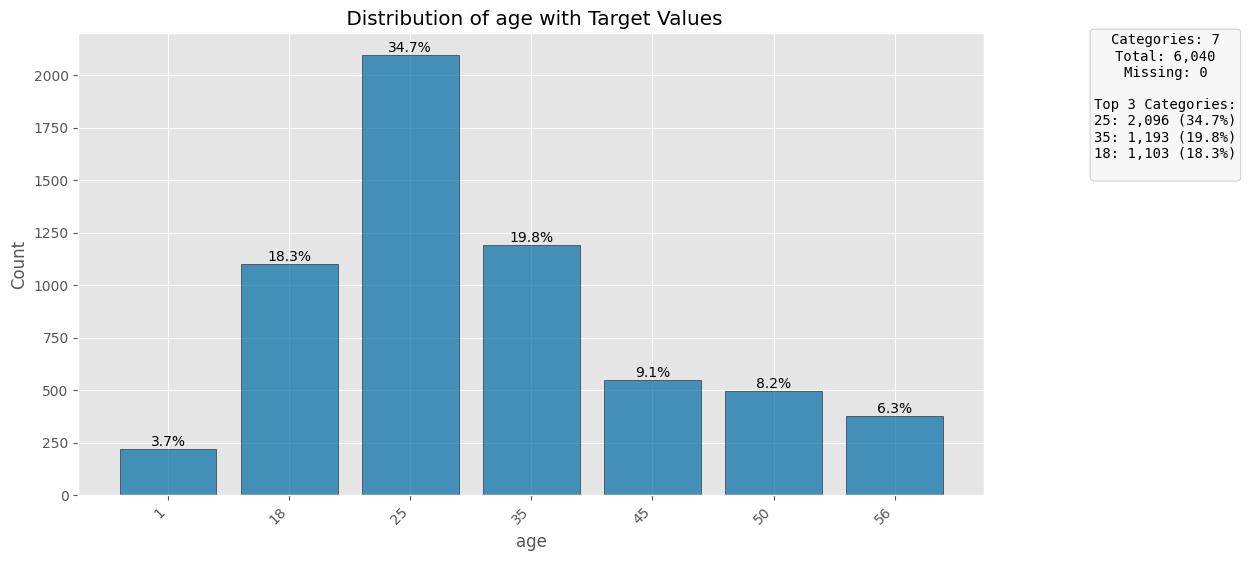

In [20]:
fig = eda_helper.analyze_categorical_feature(users, "age", bins=10)


#### distribution with max bins = 10 and single binary target

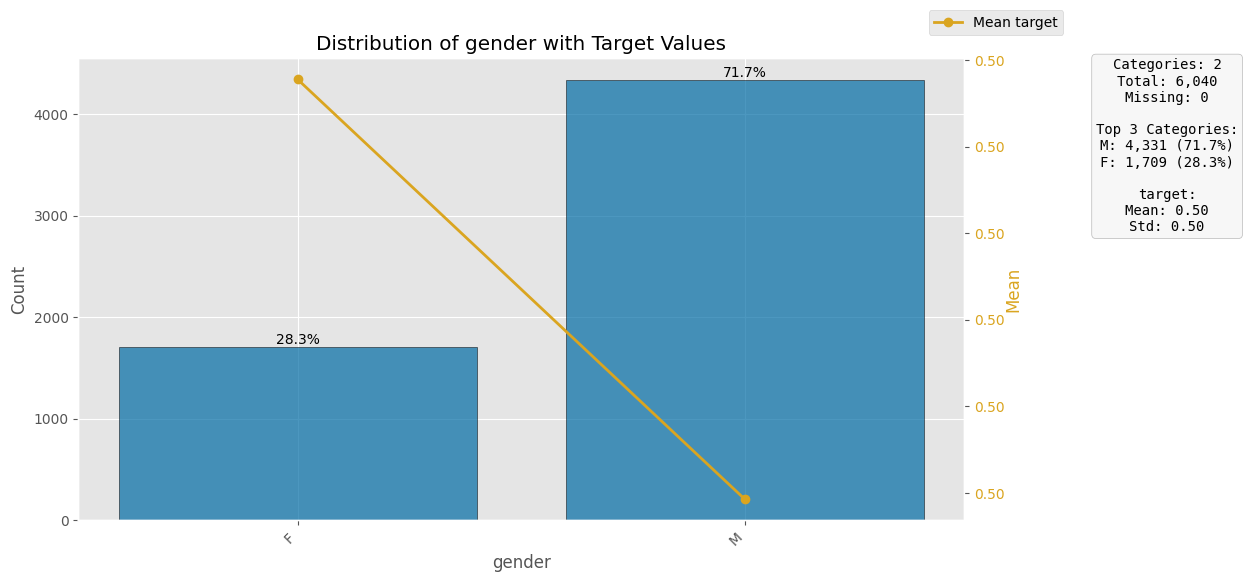

In [24]:
fig = eda_helper.analyze_categorical_feature_with_target(
    users, "gender", target="target", bins=10
)

In [ ]:
fig = eda_helper.analyze_categorical_feature_with_targets(
    users, "gender", targest=["target","target"], bins=10
)

{'gender': {0: 'F', 1: 'M'},
 'count': {0: 1709, 1: 4331},
 'proportion': {0: 0.28294701986754967, 1: 0.7170529801324503},
 'target': {0: 0.497366881217086, 1: 0.4964211498499192}}

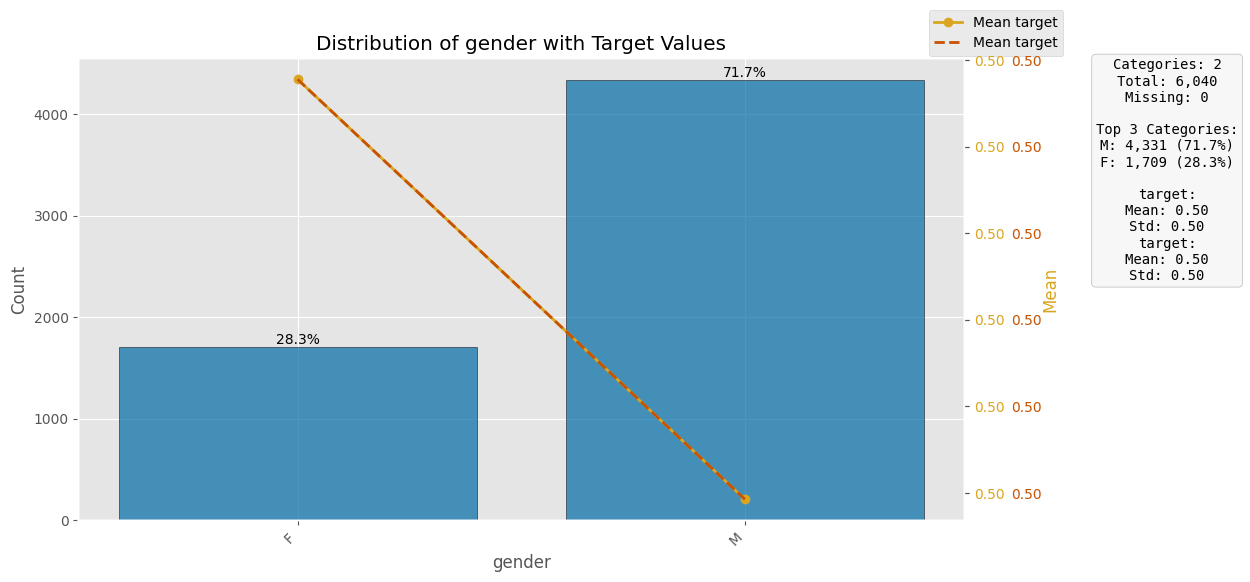

In [21]:
fig = eda_helper.analyze_categorical_feature_with_targets(
    users, "gender", targets=["target", "target"]
)

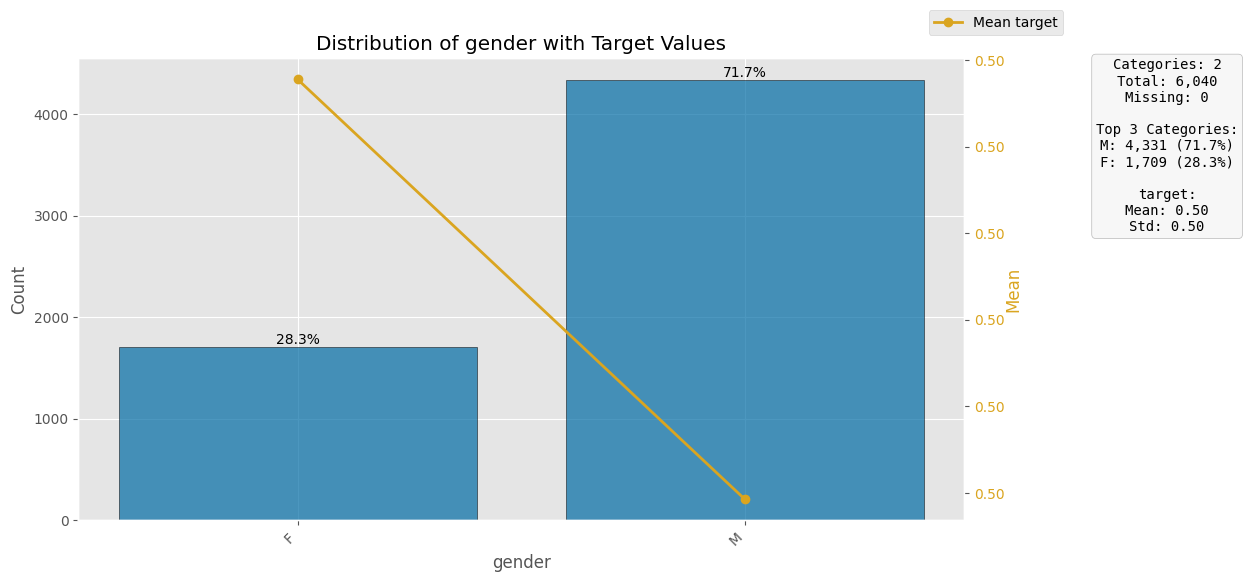

In [177]:

fig = eda_helper.analyze_numeric_feature_with_target(users, "age", target="target")
fig = eda_helper.analyze_numeric_feature_with_targets(
    users, "age", targets=["target", "target"]
)
fig = eda_helper.analyze_categorical_feature_with_targets(
    users, "gender", targets=["target", "target"]
)
fig = eda_helper.analyze_categorical_feature(users, "gender", bins=10)

all_stats = eda_helper.eda_categorical(
    ratings_samp, "rating", label="target", timecol="year_month"
)



In [ ]:
fig = eda_helper.analyze_numeric_feature_with_targets(
    users, "age", targets=["target", "target"]
)

In [167]:
ratings_samp["date"] = pd.to_datetime(ratings_samp["timestamp"], unit="s")
ratings_samp["year_month"] = ratings_samp["date"].dt.strftime("%m")
dat = eda_helper.get_time_stats(
    ratings_samp[ratings_samp["rating"] == 5], "rating", "year_month"
)
dat.head().to_dict()
assert dat.head().to_dict() == {
    "year_month": {0: "01", 1: "02", 2: "03", 3: "04", 4: "05"},
    "rating": {0: "5", 1: "5", 2: "5", 3: "5", 4: "5"},
    "count": {0: 1300, 1: 315, 2: 217, 3: 227, 4: 144},
    "proportion": {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0},
}


/var/folders/q4/s7bw96810896_5s4r65jl0780000gn/T/ipykernel_10748/1706849582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_samp['date'] = pd.to_datetime(ratings_samp['timestamp'], unit='s')
/var/folders/q4/s7bw96810896_5s4r65jl0780000gn/T/ipykernel_10748/1706849582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_samp['year_month'] = ratings_samp['date'].dt.strftime('%m')
